## 1. Reading and understanding the data.

In [965]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [966]:
#Importing Libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [967]:
# Reading the csv file and storing it in countries dataframe
countries= pd.read_csv("D:/Sushma/Data Science/Machine Learning/Clustering & PCA Assignment/Country-data.csv")

In [968]:
# Checking the head of the dataset
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [969]:
# Checking the number of columns and number of records in the countries data frame
countries.shape

(167, 10)

In [970]:
# Checking the information about the countries data frame
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [971]:
# Checking the statistics of all the numeric columns in the countries data frame
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2. Data cleaning.

In [972]:
# Checking for null values in the columns
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [973]:
# Removing duplicate records if any
countries.drop_duplicates(inplace=True)

In [974]:
# Checking the head of the dataset
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [975]:
# Checking the information about the countries data frame
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [976]:
#Checking for outliers
countries.describe(percentiles=[.05,.25, .5, .75,.95])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 3. Visualising the data

In [977]:
import matplotlib.pyplot as plt
import seaborn as sns

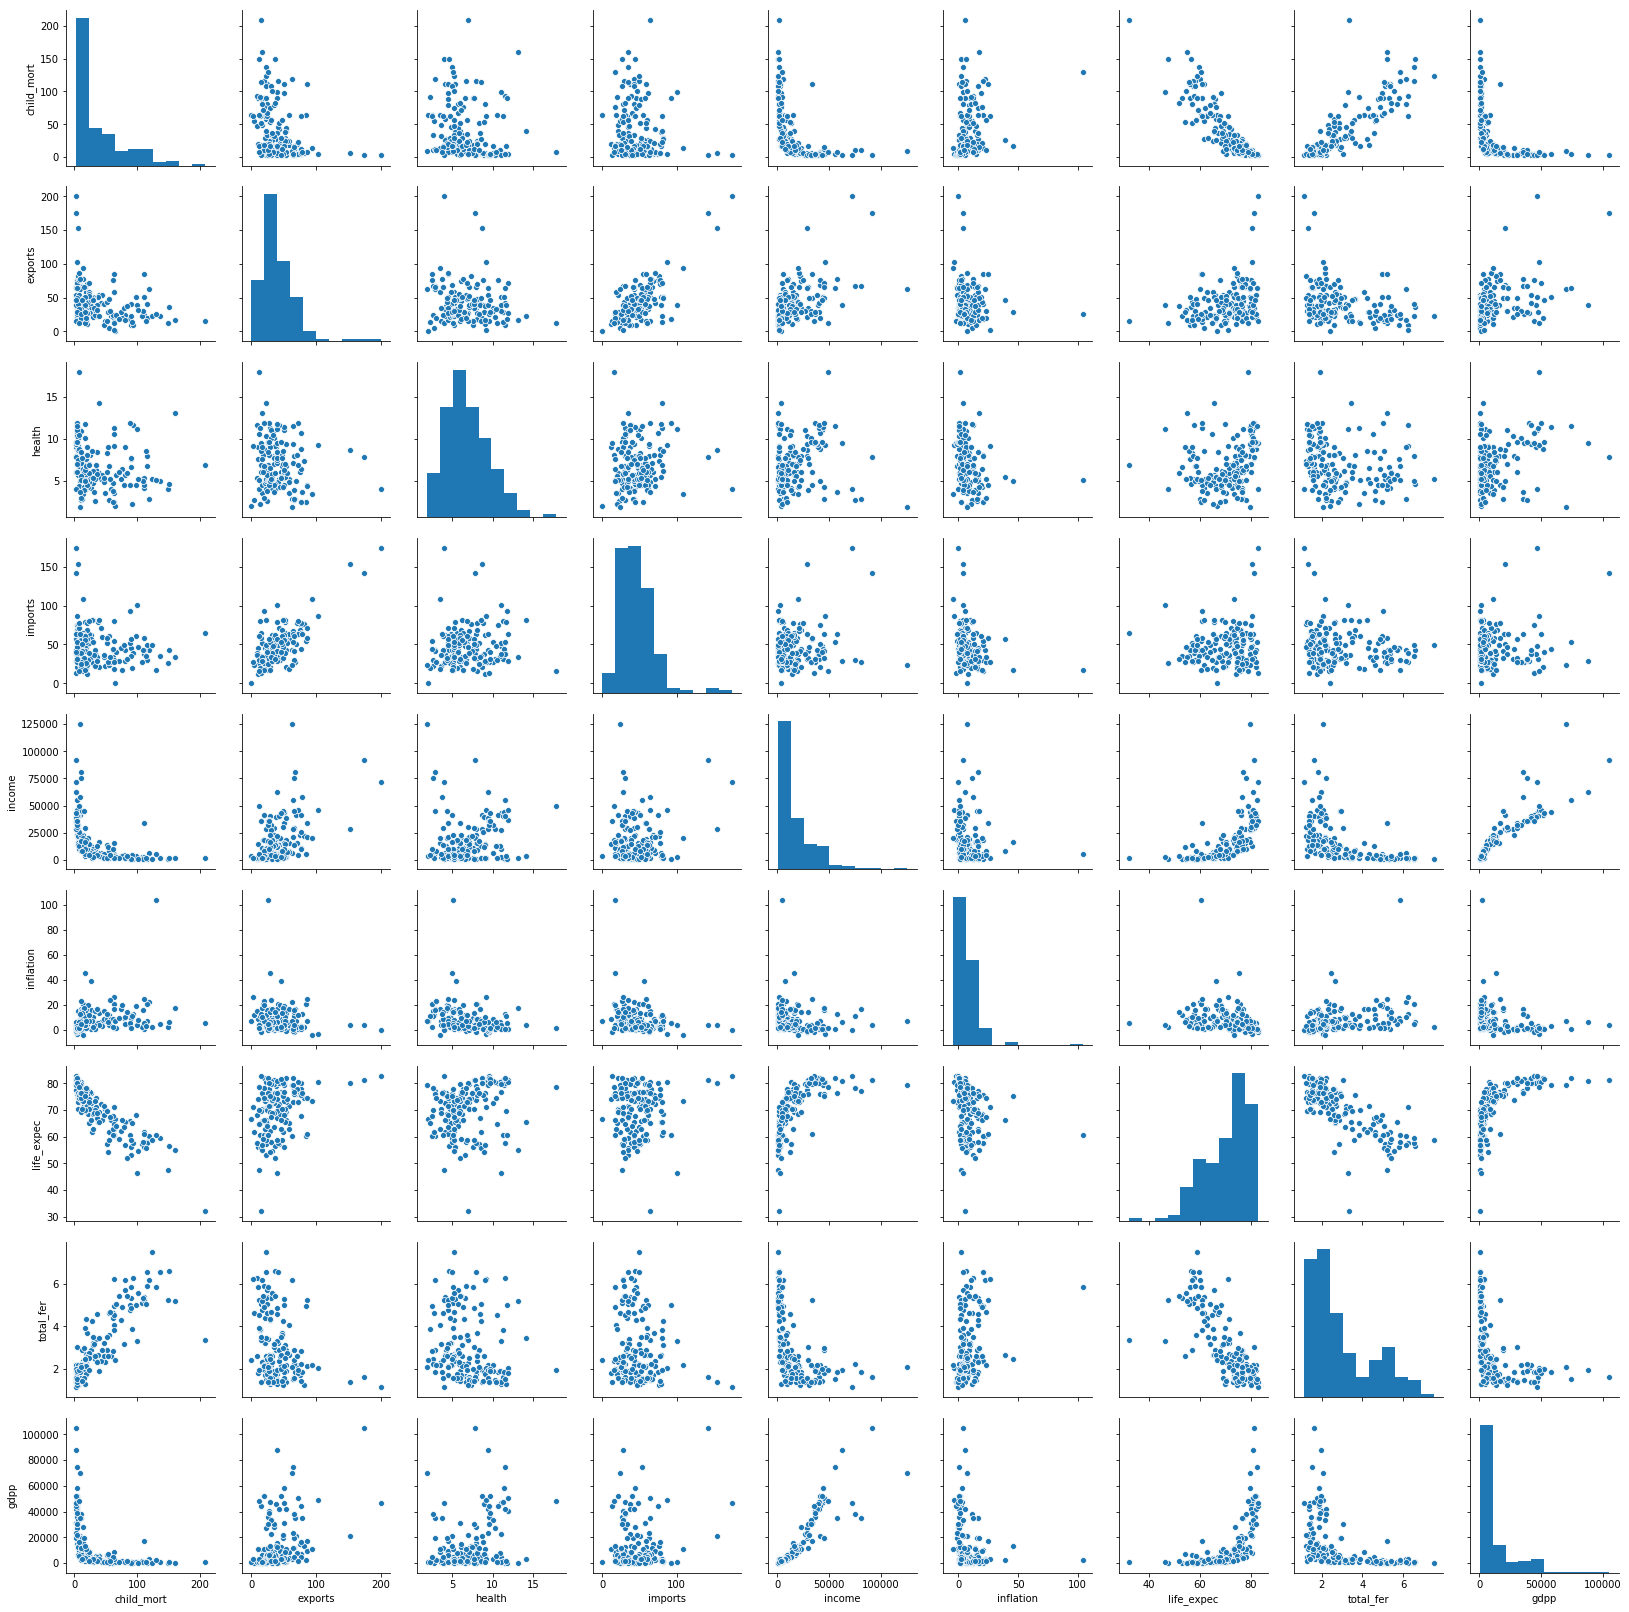

In [978]:
#Making pair plots of all the numeric variables

sns.pairplot(countries)
plt.show()

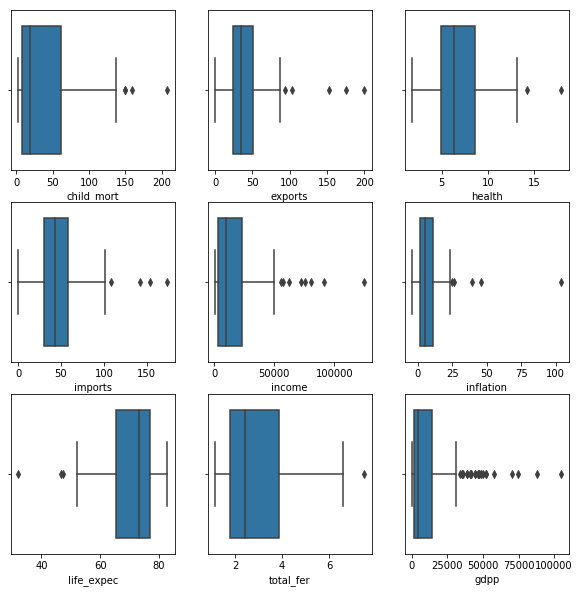

In [979]:
# Making box plots of all the categorical variables
plt.figure(figsize=(10, 10))
plt.subplot(3,3,1)
sns.boxplot(x=countries['child_mort'])
plt.subplot(3,3,2)
sns.boxplot(x=countries['exports'])
plt.subplot(3,3,3)
sns.boxplot(x=countries['health'])
plt.subplot(3,3,4)
sns.boxplot(x=countries['imports'])
plt.subplot(3,3,5)
sns.boxplot(x=countries['income'])
plt.subplot(3,3,6)
sns.boxplot(x=countries['inflation'])
plt.subplot(3,3,7)
sns.boxplot(x=countries['life_expec'])
plt.subplot(3,3,8)
sns.boxplot(x=countries['total_fer'])
plt.subplot(3,3,9)
sns.boxplot(x=countries['gdpp'])

plt.show()

In [980]:
# Removing the outliers

#Q1 = countries['gdpp'].quantile(0.05)
#Q3 = countries['gdpp'].quantile(0.75)
#IQR = Q3-Q1 #Interquartile range
#countries = countries.loc[(countries['gdpp'] >= (Q1-(1.5*IQR)))&(countries['gdpp'] <= (Q3+(1.5*IQR)))]

# Going ahead without eliminating the outliers 
#as the outlier elimination is leading to loss of many countries and leading to incorrect results

In [981]:
#countries.describe([.05,.25,.5,.75,.95])

In [982]:
#countries.info()

## 4. Data preparation.

In [983]:
# Storing continuous features in countries_num dataframe
countries_num = countries[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [984]:
#Checking the head of countries_num dataframe
countries_num.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [985]:
## Standardizing the numeric variables of countries dataframe using standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_scaled = standard_scaler.fit_transform(countries_num)
countries_scaled = pd.DataFrame(data_scaled)

In [986]:
#Checking the head of standarised data set
countries_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## 5. Hopkins Statistics

In [987]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#Defining hopkins function
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [988]:
# Checking the hopkins statistics for the scaled data set
hopkins(countries_scaled)

0.8500900290460357

In [989]:
#As the hopkins statistics value is good,proceeding with PCA
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [990]:
#Performing PCA on the scaled data
pca.fit(countries_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [991]:
#Displaying PCA components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [992]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [993]:
#Creating pcs_df data frame with 4 PCs as the max varaiance is explained by the first 4 PCS
colnames = list(countries_num.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.419519,0.192884,-0.029544,0.370653
1,exports,0.283897,0.613163,0.144761,0.003091
2,health,0.150838,-0.243087,-0.596632,0.461897
3,imports,0.161482,0.671821,-0.299927,-0.071907
4,income,0.398441,0.022536,0.301548,0.392159
5,inflation,-0.193173,-0.008404,0.642520,0.150442
6,life_expec,0.425839,-0.222707,0.113919,-0.203797
7,total_fer,-0.403729,0.155233,0.019549,0.378304
8,gdpp,0.392645,-0.046022,0.122977,0.531995


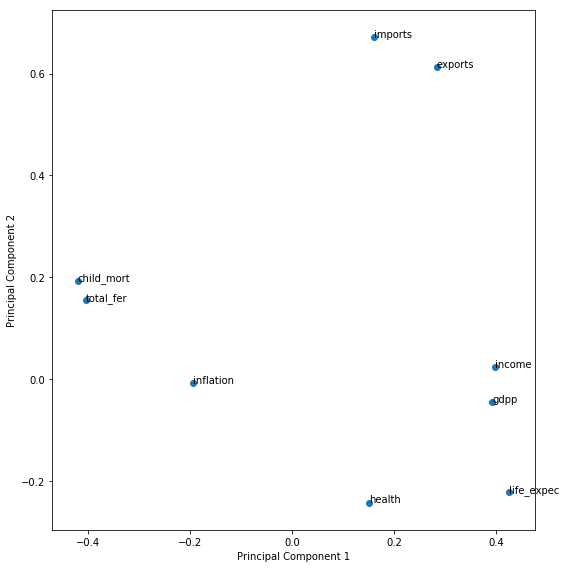

In [994]:
# Plotting scatter plot with first 2 PCS to visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

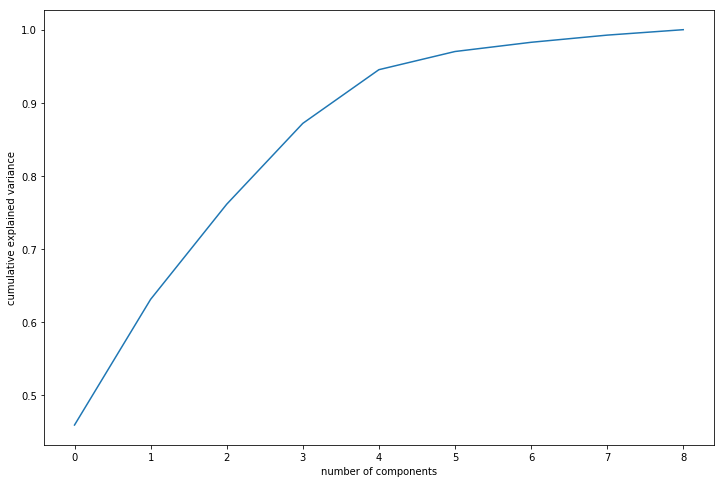

In [995]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [996]:
#Using incremental PCA with 4 components for efficiency - 4 components are selected based on the scree plot
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [997]:
#Applying incremental PCA on scaled data set
df_pca = pca_final.fit_transform(countries_scaled)

In [998]:
#Checking the sahpe of df_pca
df_pca.shape

(167, 4)

In [999]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca.transpose())

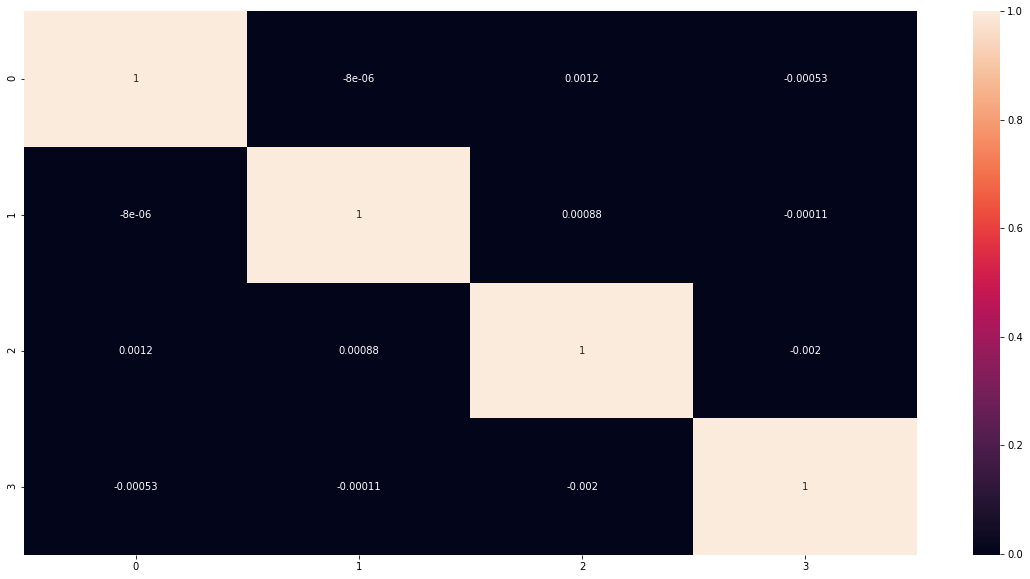

In [1000]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [1001]:
#Checking the min and max correlations using diagnol matrix
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

# we see that correlations are indeed very close to 0

max corr: 0.0011961925092543494 , min corr:  -0.002037829535552357


In [1002]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [1003]:
#Creating pcs_df2 with the first 4 principal components
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})

In [1004]:
#Checking the head of pcs_df2
pcs_df2.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


In [1005]:
#Performing outlier analysis on PCs
#plt.boxplot(pcs_df2.PC1)
#Q1 = pcs_df2.PC1.quantile(0.05)
#Q3 = pcs_df2.PC1.quantile(0.95)
#IQR = Q3 - Q1
#pcs_df2 = pcs_df2[(pcs_df2.PC1 >= Q1) & (pcs_df2.PC1 <= Q3)]

In [1006]:
#plt.boxplot(pcs_df2.PC2)
#Q1 = pcs_df2.PC2.quantile(0.05)
#Q3 = pcs_df2.PC2.quantile(0.95)
#IQR = Q3 - Q1
#pcs_df2 = pcs_df2[(pcs_df2.PC2 >= Q1) & (pcs_df2.PC2 <= Q3)]

In [1007]:
#plt.boxplot(pcs_df2.PC3)
#Q1 = pcs_df2.PC3.quantile(0.05)
#Q3 = pcs_df2.PC3.quantile(0.95)
#IQR = Q3 - Q1
#pcs_df2 = pcs_df2[(pcs_df2.PC3 >= Q1) & (pcs_df2.PC3 <= Q3)]

In [1008]:
#plt.boxplot(pcs_df2.PC4)
#Q1 = pcs_df2.PC4.quantile(0.05)
#Q3 = pcs_df2.PC4.quantile(0.95)
#IQR = Q3 - Q1
#pcs_df2 = pcs_df2[(pcs_df2.PC4 >= Q1) & (pcs_df2.PC4 <= Q3)]

#Not proceeding with the outlier elimination,as it is leading to loss of significant data and leading to incorrect results

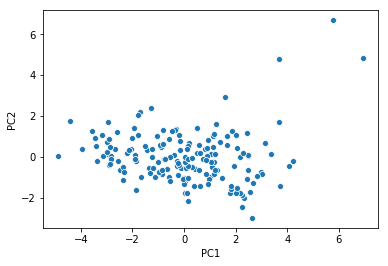

In [1009]:
#Visualising the points on the PCs.
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

In [1010]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

#Defining hopkins function
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [1011]:
#Applying hopkins fucntion on the pcs_df2 data frame
hopkins(pcs_df2)

0.7830606889303778

## 6.K-Means Clustering

In [1012]:
#As the hopkins statistics value is good, proceeding with K-Means clustering
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(pcs_df2)
    sse_.append([k, silhouette_score(pcs_df2, kmeans.labels_)])

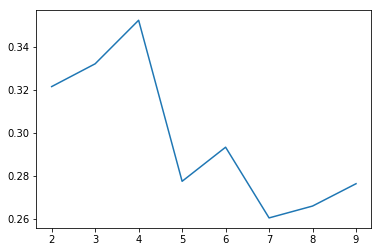

In [1013]:
#Plotting the silhouette curve
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

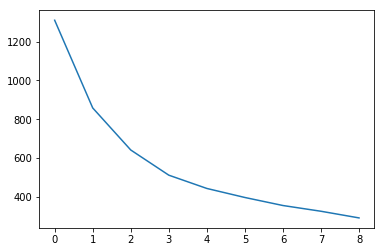

In [1014]:
## From the above analysis we find that 4 seems to be a good number of clusters for K means algorithm
# sum of squared distances
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pcs_df2)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [1015]:
#Here also we're seeing a distinct bend at around 4 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
model_clus4.fit(pcs_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [1016]:
#Concatenating the PCs with the respective cluster ids
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus4.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
dat_km

,PC1,PC2,PC3,PC4,ClusterID
0,-2.913787,0.088354,0.721003,0.996699,1
1,0.429358,-0.587859,0.321052,-1.171193,2
2,-0.282988,-0.446657,-1.225135,-0.850127,2
3,-2.930969,1.699437,-1.521734,0.875966,1
4,1.031988,0.130488,0.192922,-0.844808,2
5,0.028470,-1.756721,-0.793520,-0.052486,2
6,-0.102849,-0.567476,-0.277669,-1.458321,2
7,2.339456,-1.998120,-0.237052,1.132490,0
8,2.973859,-0.734849,0.548421,1.192561,0
9,-0.180006,-0.393752,-0.864255,-0.426657,2


In [1017]:
dat_km['ClusterID'].value_counts()

2    86
1    47
0    31
3     3
Name: ClusterID, dtype: int64

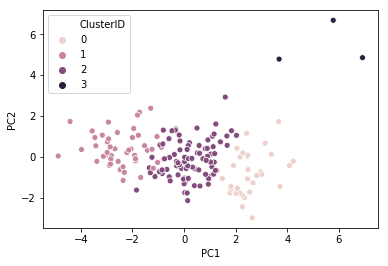

In [1018]:
#Making a scatter plot with the first PCs
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=dat_km)

In [1019]:
#Merging the original countries data set with the respective PCs and cluster ids
dat5=pd.merge(countries,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429358,-0.587859,0.321052,-1.171193,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.930969,1.699437,-1.521734,0.875966,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808,2


In [1020]:
#Checking for null values
dat5.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
PC1           0
PC2           0
PC3           0
PC4           0
ClusterID     0
dtype: int64

In [1021]:
#Removing the PCs from the merged data set
dat6=dat5.drop(['PC1','PC2','PC3','PC4'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [1022]:
#Analysing the clusters formed
clu_cmt = 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_hlt = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_inc = 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inf= 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_lex = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_tfe = 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdp = 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [1023]:
#Concatenating the mean values of the features in each cluster with respective cluster ids 
df = pd.concat([pd.Series([0,1,2,3]),clu_cmt,clu_exp,clu_hlt,clu_imp,clu_inc,clu_inf,clu_lex,clu_tfe,clu_gdp], axis=1)

In [1024]:
df.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,4.903226,46.477419,9.127097,40.483871,44703.225806,2.607613,80.283871,1.786129,42574.193548
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,21.598837,41.003360,6.216744,47.865883,12790.348837,7.516291,72.882558,2.295581,6769.325581
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


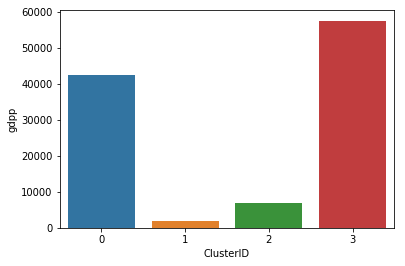

In [1025]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df.ClusterID, y=df.gdpp)

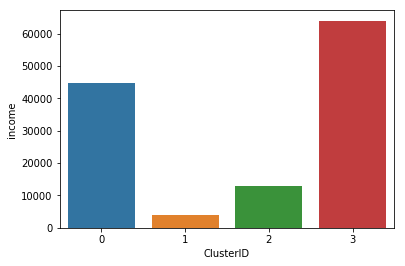

In [1026]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df.ClusterID, y=df.income)

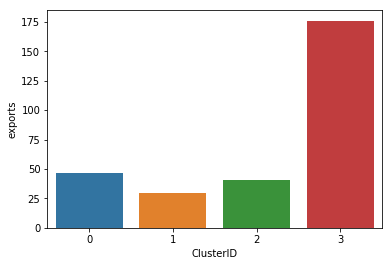

In [1027]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df.ClusterID, y=df.exports)

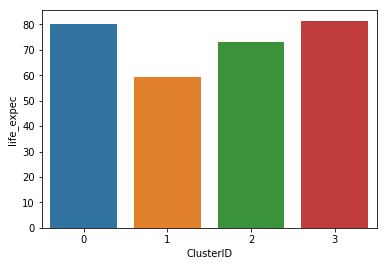

In [1028]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df.ClusterID, y=df.life_expec)

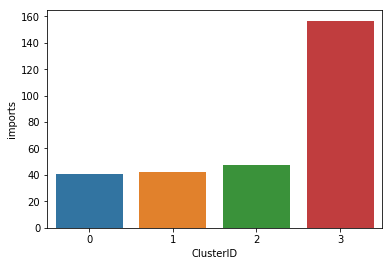

In [1029]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df.ClusterID, y=df.imports)

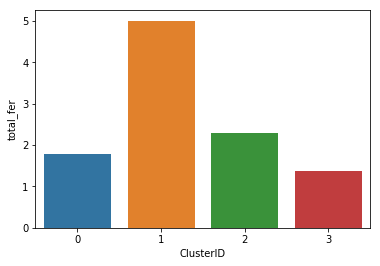

In [1030]:
sns.barplot(x=df.ClusterID, y=df.total_fer)

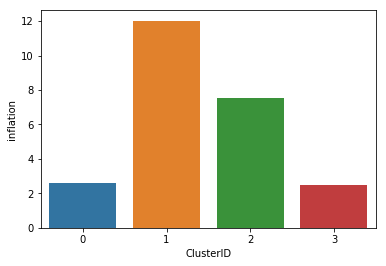

In [1031]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df.ClusterID, y=df.inflation)

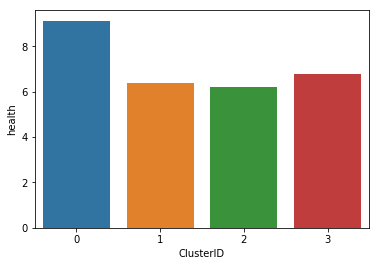

In [1032]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df.ClusterID, y=df.health)

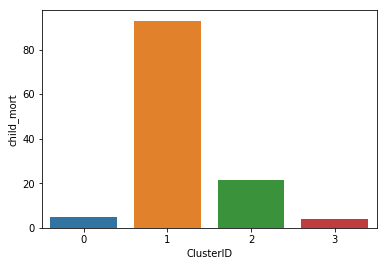

In [1033]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df.ClusterID, y=df.child_mort)

In [1034]:
#Identifying the clusters with poor socio-economic conditions based on the above graphs and storing it in dat7 data frame
dat7= dat6.loc[(dat6['ClusterID']==1)|(dat6['ClusterID']==2)]
dat7

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,2
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,2
10,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,2
11,Bahrain,8.6,69.50,4.97,50.9,41100,7.440,76.0,2.16,20700,2


In [1035]:
#Creating a new column total_1 to store the sum of values of gdpp,income,exports,imports
dat7['total_1']= dat7['gdpp']+dat7['income']+dat7['exports']+dat7['imports']

In [1036]:
#sorting the data frame in the ascending order of total_1 column to get the countries poor socio-economic condtions
dat8 = dat7.sort_values(by='total_1',ascending=True)
dat8

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,total_1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1,1033.70
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,1043.12
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,1,1138.70
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,1,1233.30
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,1372.30
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,1,1414.70
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,1,1546.70
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,1,1670.30
150,Togo,90.3,40.20,7.65,57.3,1210,1.180,58.7,4.87,488,1,1795.50
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,1,1871.00


In [1037]:
#Displaying top 5 countries which are in the direst need of aid using K-Means Clustering.
dat8.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,total_1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1,1033.70
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1,1043.12
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1,1138.70
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1,1233.30
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,1,1372.30


## 7.Heirarchical Clustering

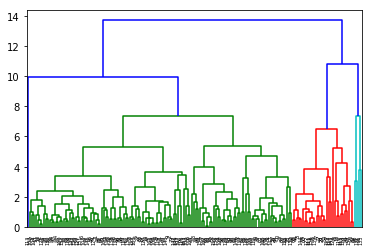

In [1038]:
#Performing hierachical clustering the pcs_df2 and displaying the dendogram created
mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [1039]:
#Cutting the dendogram by giving number of clusters as 2
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 2).reshape(-1,))

#Concatenating the clusters with the PCs
countries_hc = pd.concat([clusterCut,pcs_df2], axis=1)
countries_hc.columns = ["ClusterID","PC1","PC2","PC3","PC4"]

In [1040]:
#Counting the number of countries in each cluster
countries_hc['ClusterID'].value_counts()

0    132
1     35
Name: ClusterID, dtype: int64

In [1041]:
#Checking the head of countries_hc
countries_hc.head()

,ClusterID,PC1,PC2,PC3,PC4
0,0,-2.913787,0.088354,0.721003,0.996699
1,0,0.429358,-0.587859,0.321052,-1.171193
2,0,-0.282988,-0.446657,-1.225135,-0.850127
3,0,-2.930969,1.699437,-1.521734,0.875966
4,0,1.031988,0.130488,0.192922,-0.844808


In [1042]:
#Merging the original countries data set with the clusters created and the PCs respectively
dat10=pd.merge(countries,countries_hc, left_index=True,right_index=True)
dat10.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,PC1,PC2,PC3,PC4
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,-2.913787,0.088354,0.721003,0.996699
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,0.429358,-0.587859,0.321052,-1.171193
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,-0.282988,-0.446657,-1.225135,-0.850127
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,-2.930969,1.699437,-1.521734,0.875966
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1.031988,0.130488,0.192922,-0.844808


In [1043]:
#Checking for null values
dat10.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
ClusterID     0
PC1           0
PC2           0
PC3           0
PC4           0
dtype: int64

In [1044]:
#Removing the PCS from the data frame
dat11=dat10.drop(['PC1','PC2','PC3','PC4'],axis=1)
dat11.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [1045]:
#Analysing the clusters formed
clu_cmt = 	pd.DataFrame(dat11.groupby(["ClusterID"]).child_mort.mean())
clu_exp= 	pd.DataFrame(dat11.groupby(["ClusterID"]).exports.mean())
clu_hlt = 	pd.DataFrame(dat11.groupby(["ClusterID"]).health.mean())
clu_imp = 	pd.DataFrame(dat11.groupby(["ClusterID"]).imports.mean())
clu_inc = 	pd.DataFrame(dat11.groupby(["ClusterID"]).income.mean())
clu_inf= 	pd.DataFrame(dat11.groupby(["ClusterID"]).inflation.mean())
clu_lex = 	pd.DataFrame(dat11.groupby(["ClusterID"]).life_expec.mean())
clu_tfe = 	pd.DataFrame(dat11.groupby(["ClusterID"]).total_fer.mean())
clu_gdp = 	pd.DataFrame(dat11.groupby(["ClusterID"]).gdpp.mean())

In [1046]:
#Concatenating the mean values of the features in each cluster with respective cluster ids

df_hc = pd.concat([pd.Series([0,1]),clu_cmt,clu_exp,clu_hlt,clu_imp,clu_inc,clu_inf,clu_lex,clu_tfe,clu_gdp], axis=1)

In [1047]:
df_hc.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df_hc

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,46.772727,36.228023,6.407424,45.908833,9278.507576,8.817038,68.106061,3.226742,5200.106061
1,1,6.202857,59.517143,8.355429,50.591429,46811.428571,3.877629,79.794286,1.896571,42245.714286


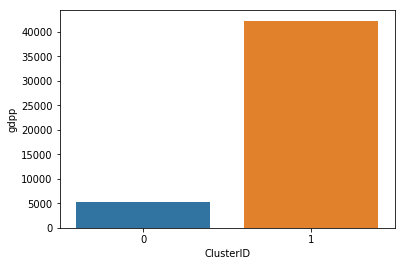

In [1048]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df_hc.ClusterID, y=df_hc.gdpp)

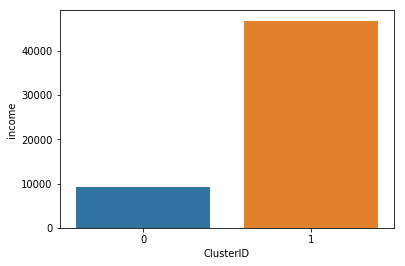

In [1049]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df_hc.ClusterID, y=df_hc.income)

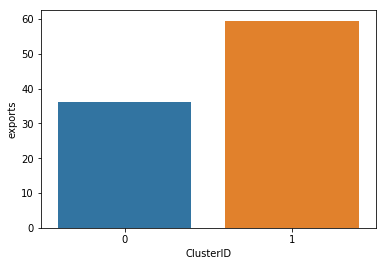

In [1050]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df_hc.ClusterID, y=df_hc.exports)

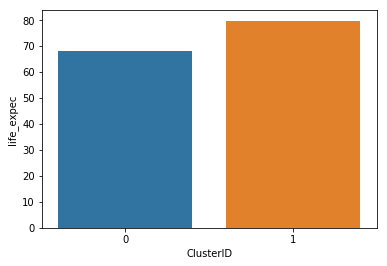

In [1051]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df_hc.ClusterID, y=df_hc.life_expec)

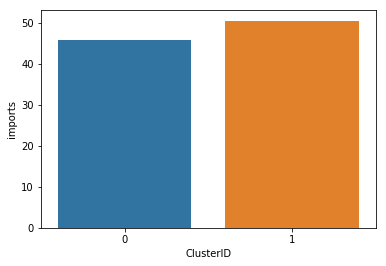

In [1052]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df_hc.ClusterID, y=df_hc.imports)

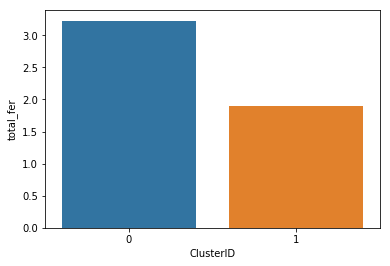

In [1053]:
sns.barplot(x=df_hc.ClusterID, y=df_hc.total_fer)

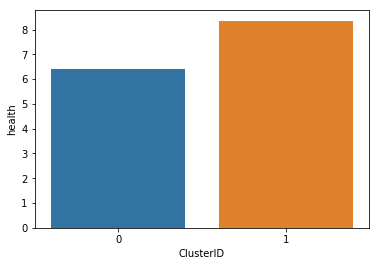

In [1054]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df_hc.ClusterID, y=df_hc.health)

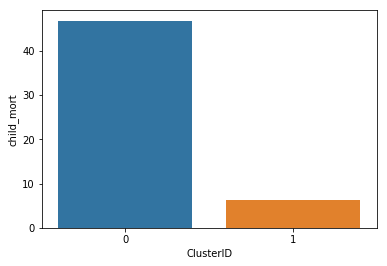

In [1055]:
#Plotting a bar graph between clusters and the mean value of features
sns.barplot(x=df_hc.ClusterID, y=df_hc.child_mort)

In [1056]:
#Identifying the clusters with poor socio-economic conditions based on the above graphs and storing it in dat12 data frame
dat12= dat11.loc[dat11['ClusterID']==0]
dat12

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0
10,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,0


In [1057]:
#Creating a new column total_2 to store the sum of values of gdpp,income,exports,imports
dat11['total_2']= dat11['gdpp']+dat11['income']+dat11['exports']+dat11['imports']
dat11

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,total_2
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0,2217.90
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0,14096.60
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0,17429.80
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0,9535.20
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0,31404.40
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0,29034.90
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0,9986.10
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,1,93340.70
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,1,90199.10
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0,21915.00


In [1058]:
#sorting the data frame in the ascending order of total_2 column to get the countries poor socio-economic condtions
dat12 = dat11.sort_values(by='total_2',ascending=True)
dat12

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,total_2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0,1033.70
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0,1043.12
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,0,1138.70
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,0,1233.30
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0,1372.30
106,Mozambique,101.0,31.50,5.21,46.2,918,7.640,54.5,5.56,419,0,1414.70
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,0,1546.70
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,0,1670.30
150,Togo,90.3,40.20,7.65,57.3,1210,1.180,58.7,4.87,488,0,1795.50
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.790,60.8,4.60,413,0,1871.00


In [1059]:
#Displaying top 5 countries which are in the direst need of aid using hierarchical clustering.
dat12.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID,total_2
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,0,1033.70
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,0,1043.12
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,0,1138.70
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,0,1233.30
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,0,1372.30


##### The list of top five countries which are in the direst need of aid are:
##### 1.Congo, Dem. Rep.
##### 2.Burundi
##### 3.Liberia
##### 4.Niger
##### 5.Central African Republic